In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

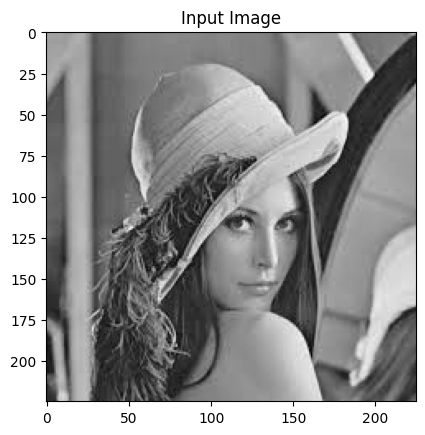

In [8]:
img = cv2.imread('images/lena.jpeg', 0)
img_k_space = np.fft.fft2(img)
img_k_space = np.fft.fftshift(img_k_space)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.show()

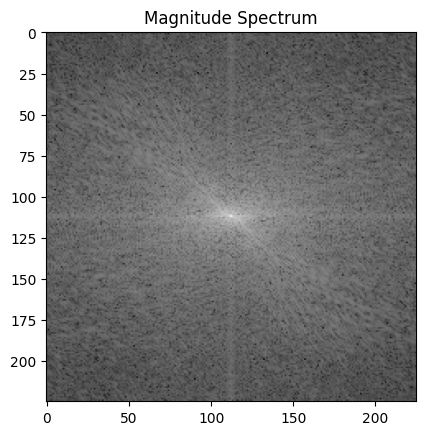

In [7]:
# plot the magnitude of the image in the frequency domain
magnitude_spectrum = 20*np.log(np.abs(img_k_space))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

In [9]:
window_size = 30
rows, cols = img.shape
center_row, center_col = rows//2, cols//2
# create a mask with the same size as the image
high_pass_mask = np.ones((rows, cols), np.uint8)
high_pass_mask[center_row-window_size:center_row+window_size, center_col-window_size:center_col+window_size] = 0

low_pass_mask = np.zeros((rows, cols), np.uint8)
low_pass_mask[center_row-window_size:center_row+window_size, center_col-window_size:center_col+window_size] = 1

low_pass_filtered_img = img_k_space * low_pass_mask
high_pass_filtered_img = img_k_space * high_pass_mask

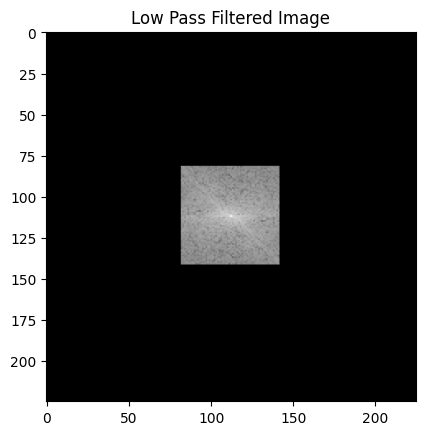

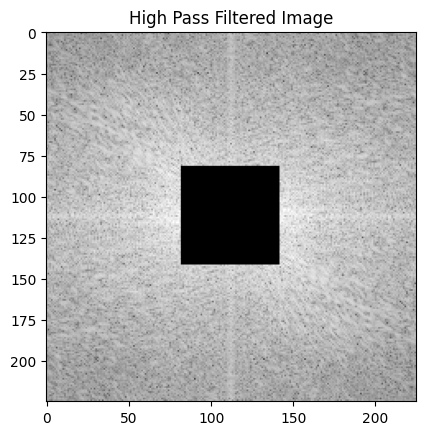

In [11]:
magnitude_spectrum_low_pass = 20*np.log1p(np.abs(low_pass_filtered_img))
magnitude_spectrum_high_pass = 20*np.log1p(np.abs(high_pass_filtered_img))
plt.imshow(magnitude_spectrum_low_pass, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.show()
plt.imshow(magnitude_spectrum_high_pass, cmap='gray')
plt.title('High Pass Filtered Image')
plt.show()

In [12]:
# inverse fourier transform
low_pass_img = np.fft.ifftshift(low_pass_filtered_img)
low_pass_img = np.fft.ifft2(low_pass_img)
low_pass_img = np.abs(low_pass_img)

high_pass_img = np.fft.ifftshift(high_pass_filtered_img)
high_pass_img = np.fft.ifft2(high_pass_img)
high_pass_img = np.abs(high_pass_img)

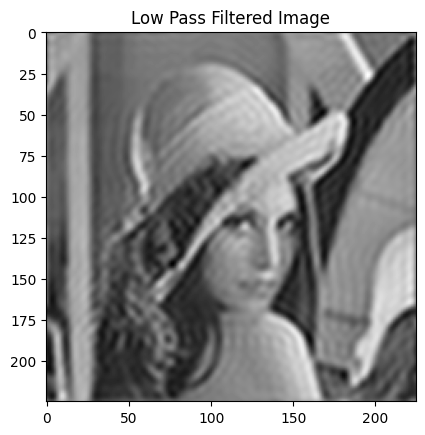

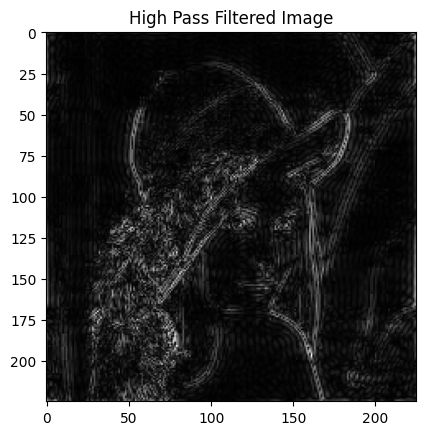

In [13]:
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.show()

plt.imshow(high_pass_img, cmap='gray')
plt.title('High Pass Filtered Image')
plt.show()